# DonorsChoose

##### <p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/train_data.csv')
resource_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity  
0         4  
1         8

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +' '+\
                        project_data["project_essay_2"].map(str) + ' '+\
                        project_data["project_essay_3"].map(str) + ' '+\
                        project_data["project_essay_4"].map(str)
#Some projects have no 3rd and 4th eassay. So those projects have NaN values in that rows. 
#we want we can remove it later either by considering it as stop word or using regular expression.

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[48999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons. My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students. Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, 

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub('nan','',phrase) #Removing nan from each essay.
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

\"Life moves pretty fast. If you do not stop and look around once in awhile, you could miss it.\"  from the movie, Ferris Bueller is Day Off.  Think back...what do you remember about your grandparents?  How amazing would it be to be able to flip through a book to see a day in their lives? My second graders are voracious readers! They love to read both fiction and nonfiction books.  Their favorite characters include Pete the Cat, Fly Guy, Piggie and Elephant, and Mercy Watson. They also love to read about insects, space and plants. My students are hungry bookworms! My students are eager to learn and read about the world around them. My kids love to be at school and are like little sponges absorbing everything around them. Their parents work long hours and usually do not see their children. My students are usually cared for by their grandparents or a family friend. Most of my students do not have someone who speaks English at home. Thus it is difficult for my students to acquire language

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 Life moves pretty fast. If you do not stop and look around once in awhile, you could miss it.   from the movie, Ferris Bueller is Day Off.  Think back...what do you remember about your grandparents?  How amazing would it be to be able to flip through a book to see a day in their lives? My second graders are voracious readers! They love to read both fiction and nonfiction books.  Their favorite characters include Pete the Cat, Fly Guy, Piggie and Elephant, and Mercy Watson. They also love to read about insects, space and plants. My students are hungry bookworms! My students are eager to learn and read about the world around them. My kids love to be at school and are like little sponges absorbing everything around them. Their parents work long hours and usually do not see their children. My students are usually cared for by their grandparents or a family friend. Most of my students do not have someone who speaks English at home. Thus it is difficult for my students to acquire language. 

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 Life moves pretty fast If you do not stop and look around once in awhile you could miss it from the movie Ferris Bueller is Day Off Think back what do you remember about your grandparents How amazing would it be to be able to flip through a book to see a day in their lives My second graders are voracious readers They love to read both fiction and nonfiction books Their favorite characters include Pete the Cat Fly Guy Piggie and Elephant and Mercy Watson They also love to read about insects space and plants My students are hungry bookworms My students are eager to learn and read about the world around them My kids love to be at school and are like little sponges absorbing everything around them Their parents work long hours and usually do not see their children My students are usually cared for by their grandparents or a family friend Most of my students do not have someone who speaks English at home Thus it is difficult for my students to acquire language Now think forward would not i

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.remove('not')
stopwords.remove('no')
stopwords.remove('nor')

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:09<00:00, 843.36it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
print(project_data['project_title'].values[9])
print(project_data['project_title'].values[29877])
print(project_data['project_title'].values[8607])

Dash and Dot Robotic Duo Needed
Dancing Our Way to Healthy Choices
Move and Groove...Outside Play


In [19]:
preprocessed_title = []
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(e for e in title.split() if e.lower() not in stopwords)
    preprocessed_title.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19035.38it/s]


In [20]:
#after preprocessing title
preprocessed_title[29877]

'dancing way healthy choices'

<h2><font color='red'> 1.5 Preprocessing of `project_resource_summary`</font></h2>

In [21]:
print(project_data['project_resource_summary'].values[9])
print(project_data['project_resource_summary'].values[29877])
print(project_data['project_resource_summary'].values[8647])

My students need a Dash & Dot Pack and Wonder Pack to explore the possibilities of coding for beginners.
My students need a boombox, Ipad and case to perform to help them increase their movement throughout the day.
My students need durable instruments that they can use and take home to practice to increase their ability to play music


In [22]:
preprocessed_summary = []
for t in tqdm(project_data['project_resource_summary'].values):
    t = decontracted(t)
    t = t.replace('\\r', ' ')
    t = t.replace('\\"', ' ')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ', t)
    t = ' '.join(e for e in t.split() if e.lower() not in stopwords)
    preprocessed_summary.append(t.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:13<00:00, 8018.28it/s]


In [23]:
#after preprocessing title
preprocessed_summary[29877]

'students need boombox ipad case perform help increase movement throughout day'

**After preprocessing of text we will replace original text columns with preprocessed one from our sampled dataframe.**

In [24]:
project_data.drop(['project_essay_1','project_essay_2', 'project_essay_3', 'project_essay_4'], axis = 1,inplace=True)
project_data['essay'] = preprocessed_essays
project_data['project_title'] = preprocessed_title
project_data['project_resource_summary'] = preprocessed_summary

In [26]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

## 1.6 Preparing data for models

In [27]:
print(project_data.shape)
print(project_data.columns)

(109248, 16)
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical
      
We will drop ['Unnamed: 0', 'id', 'teacher_id','Date']

In [28]:
project_data.drop(['Unnamed: 0', 'id', 'teacher_id','Date'],axis=1,inplace=True)
print(project_data.shape)
print(project_data.columns)

(109248, 12)
Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')


In [29]:
project_data.isnull().sum() #Presence of null value

teacher_prefix                                  3
school_state                                    0
project_grade_category                          0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
price                                           0
quantity                                        0
clean_categories                                0
clean_subcategories                             0
essay                                           0
dtype: int64

There is 1 missing value in teacher_prefix column. We will impute it with most frequently occuring values in that respective column.

In [30]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode()[0],inplace = True)
project_data['teacher_prefix'].isnull().sum()

0

In [31]:
#Rather than restarting all notebook cells(which is very time consuming), we will save notebook session using dill library.
# Saving jupyter notebook session https://stackoverflow.com/a/50985430/8107740
import dill
dill.dump_session('preprocessed_data.db')
#We can also use pickle module for object serializtion, but I will give dill library a try as dill is an extension to pickle:) 

In [1]:
import dill
dill.load_session('preprocessed_data.db')

<h3><font color = 'blue'>Separating independent and dependent variables.</font></h3>

In [2]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis = 1,inplace=True)
X = project_data

In [3]:
X.head(2)

teacher_prefix school_state project_grade_category  \
0           Mrs.           CA          Grades PreK-2   
1            Ms.           UT             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects   price  quantity  \
0                                            53  725.05         4   
1                                             4  213.03         8   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

## 2.1 Splitting data into Train and cross validation(or test): Stratified Sampling
Here I won't split our train data again as train and cross-validation set. Because I will use *GRIDSEARCHCV* to find best hyperparameter(alpha).

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.33,stratify = y)

In [5]:
#Shape of matrix after splitting
print('Train data shape: ',X_train.shape,y_train.shape)
print('Test data shape: ', X_test.shape,y_test.shape)

Train data shape:  (73196, 11) (73196,)
Test data shape:  (36052, 11) (36052,)


## 2.2 Make Data Model Ready : encoding categorical features

<h3><font color='magenta'>One hot encoding: 'clean_categories'</font>

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values)

feature_categories = vectorizer.get_feature_names()

X_tr_categories = vectorizer.transform(X_train['clean_categories'].values)
X_te_categories = vectorizer.transform(X_test['clean_categories'].values)

print('Shape of matrix after vectorization')
print(X_tr_categories.shape)
print(X_te_categories.shape)

print('Features: ', feature_categories)

Shape of matrix after vectorization
(73196, 9)
(36052, 9)
Features:  ['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3><font color='magenta'>One hot encoding: 'clean_subcategories'</font>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

feature_subcategories = vectorizer.get_feature_names()

X_tr_subcategories = vectorizer.transform(X_train['clean_subcategories'].values)
X_te_subcategories = vectorizer.transform(X_test['clean_subcategories'].values)

print('Shape of matrix after vectorization')
print(X_tr_subcategories.shape)
print(X_te_subcategories.shape)

print('Features: ', feature_subcategories)

Shape of matrix after vectorization
(73196, 30)
(36052, 30)
Features:  ['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3><font color='magenta'>One hot encoding: school_state</font>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values)

feature_school_state = vectorizer.get_feature_names()

X_tr_school_state = vectorizer.transform(X_train['school_state'].values)
X_te_school_state = vectorizer.transform(X_test['school_state'].values)

print('Shape of matrix after vectorization')
print(X_tr_school_state.shape)
print(X_te_school_state.shape)

print('Features: ', feature_school_state)

Shape of matrix after vectorization
(73196, 51)
(36052, 51)
Features:  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3><font color='magenta'>One hot encoding: teacher_prefix</font>

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_tr_teacher_prefix = ohe.fit_transform(X_train['teacher_prefix'].values.reshape(-1,1))
X_te_teacher_prefix = ohe.transform(X_test['teacher_prefix'].values.reshape(-1,1))

feature_teacher_prefix = ohe.get_feature_names()

print('Shape of matrix after vectorization')
print(X_tr_teacher_prefix.shape)
print(X_te_teacher_prefix.shape)

print('Features: ', feature_teacher_prefix)

Shape of matrix after vectorization
(73196, 5)
(36052, 5)
Features:  ['x0_Dr.' 'x0_Mr.' 'x0_Mrs.' 'x0_Ms.' 'x0_Teacher']


<h3><font color='magenta'>One hot encoding: project_grade_category</font>

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_tr_grade = ohe.fit_transform(X_train['project_grade_category'].values.reshape(-1,1))
X_te_grade = ohe.transform(X_test['project_grade_category'].values.reshape(-1,1))

feature_grade_category = ohe.get_feature_names()

print('Shape of matrix after vectorization')
print(X_tr_grade.shape)
print(X_te_grade.shape)

print('Features: ', feature_grade_category)

Shape of matrix after vectorization
(73196, 4)
(36052, 4)
Features:  ['x0_Grades 3-5' 'x0_Grades 6-8' 'x0_Grades 9-12' 'x0_Grades PreK-2']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### Bag of Word(BOW)

<h3><font color='magenta'>Bag of words: 'essay'</font>

In [11]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_tr_essay_bow = vectorizer.transform(X_train['essay'].values)
X_te_essay_bow = vectorizer.transform(X_test['essay'].values)

feature_essay_bow = vectorizer.get_feature_names()

print(X_tr_essay_bow.shape)
print(X_te_essay_bow.shape)
print('Some features: ', feature_essay_bow[20:35])

(73196, 5000)
(36052, 5000)
Some features:  ['20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '27', '28']


<h3><font color='magenta'>Bag of words: 'project_title'</font>

In [12]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=1000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

X_tr_title_bow = vectorizer.transform(X_train['project_title'].values)
X_te_title_bow = vectorizer.transform(X_test['project_title'].values)

feature_title_bow = vectorizer.get_feature_names()

print(X_tr_title_bow.shape)
print(X_te_title_bow.shape)
print('Some features: ', feature_title_bow[20:35])

(73196, 1000)
(36052, 1000)
Some features:  ['5th graders', '6th', 'academic', 'access', 'accessible', 'achieve', 'achievement', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'activities']


### TFIDF

<h3><font color='magenta'>Tfidf: 'essay'</font>

In [13]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_tr_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_te_essay_tfidf = vectorizer.transform(X_test['essay'].values)

feature_essay_tfidf = vectorizer.get_feature_names()

print(X_tr_essay_tfidf.shape)
print(X_te_essay_tfidf.shape)
print('Some features: ', feature_essay_tfidf[20:35])

(73196, 5000)
(36052, 5000)
Some features:  ['20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '27', '28']


<h3><font color='magenta'>Tfidf: 'project_title'</font>

In [14]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=1000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

X_tr_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_te_title_tfidf = vectorizer.transform(X_test['project_title'].values)

feature_title_tfidf = vectorizer.get_feature_names()

print(X_tr_title_tfidf.shape)
print(X_te_title_tfidf.shape)
print('Some features: ', feature_title_tfidf[20:35])

(73196, 1000)
(36052, 1000)
Some features:  ['5th graders', '6th', 'academic', 'access', 'accessible', 'achieve', 'achievement', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'activities']


### AvgW2V

In [15]:
list_of_essay=[]
for sentence in X_train['essay'].values:
    list_of_essay.append(sentence.split())

list_of_title=[]
for sentence in X_train['project_title'].values:
    list_of_title.append(sentence.split())


In [16]:
model_essay = Word2Vec(list_of_essay, min_count=10, size=50, workers=10) #w2v for essay
model_title = Word2Vec(list_of_title, min_count=10, size=50, workers=10) #w2v for project_title

In [17]:
print(model_essay.wv.most_similar('learn'))

[('learning', 0.662887692451477), ('explore', 0.6162784695625305), ('thrive', 0.6089723706245422), ('teach', 0.6019064784049988), ('students', 0.5954041481018066), ('learners', 0.5884374380111694), ('always', 0.5878180265426636), ('everyday', 0.578800618648529), ('succeed', 0.5705990195274353), ('discover', 0.5679332613945007)]


In [18]:
print(model_title.wv.most_similar('knowledge'))

[('bridge', 0.9636699557304382), ('culture', 0.9616502523422241), ('brighter', 0.960326075553894), ('global', 0.9602066278457642), ('citizens', 0.9579775333404541), ('fingertips', 0.9558817148208618), ('innovators', 0.9554588794708252), ('bridges', 0.9544488787651062), ('capturing', 0.9527745842933655), ('issues', 0.9479653239250183)]


In [19]:
w2v_words_essay = list(model_essay.wv.vocab)
w2v_words_title = list(model_title.wv.vocab)

In [20]:
def avgw2v(data_list, vocab_list, model): #Function defined to find average w2v for each sentence.
    avg_w2v = []
    for sent in tqdm(data_list):
        vector = np.zeros(50)
        count_words = 0
        for word in sent.split():
            if word in vocab_list:
                vector += model.wv[word]
                count_words +=1
        if count_words != 0:
            vector /= count_words
        avg_w2v.append(vector)
    return avg_w2v


<h3><font color='magenta'>Avgw2v: 'essay'</font>

In [21]:
X_tr_essay_avgw2v = avgw2v(X_train['essay'].values, w2v_words_essay, model_essay)
X_te_essay_avgw2v = avgw2v(X_test['essay'].values, w2v_words_essay, model_essay)

print(len(X_tr_essay_avgw2v),len(X_tr_essay_avgw2v[3345]) )
print(len(X_te_essay_avgw2v),len(X_te_essay_avgw2v[2845]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:41<00:00, 354.31it/s]


73196 50
36052 50


<h3><font color='magenta'>Avgw2v: 'project title'</font>

In [22]:
X_tr_title_avgw2v = avgw2v(X_train['project_title'].values, w2v_words_title, model_title)
X_te_title_avgw2v = avgw2v(X_test['project_title'].values, w2v_words_title, model_title)

print(len(X_tr_title_avgw2v),len(X_tr_title_avgw2v[3345]) )
print(len(X_te_title_avgw2v),len(X_te_title_avgw2v[2845]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 21188.36it/s]


73196 50
36052 50


### TFIDF W2V

In [23]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# Creating dictionary where each word in eassay is key and its corresponding idf value is value.
dictionary_essay = dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word_essay = set(tfidf_model.get_feature_names())

In [24]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
# Creating dictionary where each word in eassay is key and its corresponding idf value is value.
dictionary_title = dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word_title = set(tfidf_model.get_feature_names())

In [25]:
def tfidfw2v(data_list, vocab_list, tfidf_word, dictionary,model):
    #Calculating tfidf weighted w2v for each essay
    tfidfw2v = []

    for sent in tqdm(data_list):
        vector = np.zeros(50)
        sum_weight = 0
        for word in sent.split():
            if (word in vocab_list) and (word in tfidf_word):
                tf_idf = (sent.count(word)/len(sent.split()))*dictionary[word] # getting the tfidf value for each word
                vector += (model.wv[word]*tf_idf) # calculating tfidf weighted w2v
                sum_weight += tf_idf
        if sum_weight !=0:
            vector /= sum_weight
        tfidfw2v.append(vector)
    return tfidfw2v

<h3><font color='magenta'>Tfidfw2v: 'essay'</font>

In [26]:
X_tr_essay_tfidfw2v = tfidfw2v(X_train['essay'].values, w2v_words_essay,tfidf_word_essay, dictionary_essay, model_essay)
X_te_essay_tfidfw2v = tfidfw2v(X_test['essay'].values, w2v_words_essay,tfidf_word_essay, dictionary_essay, model_essay)

print(len(X_tr_essay_tfidfw2v),len(X_tr_essay_tfidfw2v[3345]) )
print(len(X_te_essay_tfidfw2v),len(X_te_essay_tfidfw2v[2845]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [02:35<00:00, 232.18it/s]


73196 50
36052 50


<h3><font color='magenta'>Tfidfw2v: 'project_title'</font>

In [27]:
X_tr_title_tfidfw2v = tfidfw2v(X_train['project_title'].values, w2v_words_title,tfidf_word_title, dictionary_title, model_title)
X_te_title_tfidfw2v = tfidfw2v(X_test['project_title'].values, w2v_words_title,tfidf_word_title, dictionary_title, model_title)

print(len(X_tr_title_tfidfw2v),len(X_tr_title_tfidfw2v[3345]))
print(len(X_te_title_tfidfw2v),len(X_te_title_tfidfw2v[2845]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:02<00:00, 17189.06it/s]


73196 50
36052 50


In [28]:
#dumping notebook session 
dill.dump_session('upto_tfidfw2v.db') 

In [1]:
import dill
dill.load_session('upto_tfidfw2v.db')

## Merging all features for each Set
Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)<br>
Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF)<br>
Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)<br>
Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

In [2]:
#Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)
from scipy.sparse import hstack
X_train_bow = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_bow, X_tr_title_bow)) #text

X_test_bow = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_bow, X_te_title_bow)) #text

In [3]:
#Satcking/Appending feature for set 1
feature_bow = feature_categories + feature_subcategories + feature_school_state+list(feature_teacher_prefix) +\
                list(feature_grade_category)+['teacher_num_previous_posted_project','price', 'quantity'] + \
                feature_essay_bow + feature_title_bow
print(len(feature_bow))
print(X_train_bow.shape)

6102
(73196, 6102)


In [4]:
import pickle
#Saving each set data in pickle file 
with open('train_bow.pickle', 'wb') as f:
    pickle.dump(X_train_bow, f)

with open('test_bow.pickle', 'wb') as f:
    pickle.dump(X_test_bow, f)

with open('feature_bow.pickle', 'wb') as f:
    pickle.dump(feature_bow, f)

In [5]:
#Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF)
X_train_tfidf = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_tfidf, X_tr_title_tfidf)) #text

X_test_tfidf = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_tfidf, X_te_title_tfidf)) #text

In [6]:
#Satcking/Appending feature for set 1
feature_tfidf = feature_categories + feature_subcategories + feature_school_state+list(feature_teacher_prefix) +\
                list(feature_grade_category)+['teacher_num_previous_posted_project','price', 'quantity'] + \
                feature_essay_tfidf + feature_title_tfidf
print(len(feature_tfidf))
print(X_train_tfidf.shape)

6102
(73196, 6102)


In [7]:
#Saving each set data in pickle file 
with open('train_tfidf.pickle', 'wb') as f:
    pickle.dump(X_train_tfidf, f)

with open('test_tfidf.pickle', 'wb') as f:
    pickle.dump(X_test_tfidf, f)
    
with open('feature_tfidf.pickle', 'wb') as f:
    pickle.dump(feature_tfidf, f)

In [8]:
#Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
X_train_avgw2v = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_avgw2v, X_tr_title_avgw2v)) #text

X_test_avgw2v = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_avgw2v, X_te_title_avgw2v)) #text

In [9]:
#Saving each set data in pickle file 
with open('train_avgw2v.pickle', 'wb') as f:
    pickle.dump(X_train_avgw2v, f)

with open('test_avgw2v.pickle', 'wb') as f:
    pickle.dump(X_test_avgw2v, f)

In [10]:
#Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)
X_train_tfidfw2v = hstack((X_tr_categories, X_tr_subcategories, X_tr_teacher_prefix, X_tr_school_state, X_tr_grade,     #categorical
                     X_train[['teacher_number_of_previously_posted_projects']], X_train[['price']], X_train[['quantity']], #numerical
                     X_tr_essay_tfidfw2v, X_tr_title_tfidfw2v)) #text

X_test_tfidfw2v = hstack((X_te_categories, X_te_subcategories, X_te_teacher_prefix, X_te_school_state, X_te_grade,     #categorical
                     X_test[['teacher_number_of_previously_posted_projects']], X_test[['price']], X_test[['quantity']], #numerical
                     X_te_essay_tfidfw2v, X_te_title_tfidfw2v)) #text

In [11]:
#Saving each set data in pickle file 
with open('train_tfidfw2v.pickle', 'wb') as f:
    pickle.dump(X_train_tfidfw2v, f)

with open('test_tfidfw2v.pickle', 'wb') as f:
    pickle.dump(X_test_tfidfw2v, f)

In [12]:
#Saving each target variable in pickle file
with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

## 2.3.1 Applying DecisionTree on BOW, SET 1

In [2]:
import pickle
#loading Set 1 data
with open('train_bow.pickle', 'rb') as f:
    train_bow = pickle.load(f)
    
with open('test_bow.pickle', 'rb') as f:
    test_bow = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)
    
with open('feature_bow.pickle', 'rb') as f:
    feature_bow = pickle.load(f)

<font color = 'blue'> Using GridSearchCV for hyperparameter tuning.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],
               'min_samples_split':  [5, 10, 100, 500]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True)
clf.fit(train_bow, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [4]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [5]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_train_score'])
test_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_test_score'])
print(train_score)
print(test_score)

                        mean_train_score                              
param_min_samples_split              5         10        100       500
param_max_depth                                                       
1                               0.572842  0.572842  0.572842  0.572842
5                               0.680635  0.680635  0.680500  0.679593
10                              0.767284  0.764727  0.753398  0.736040
50                              0.969273  0.959219  0.903613  0.837128
100                             0.991836  0.985640  0.944370  0.855275
500                             0.999885  0.998046  0.964463  0.873947
                        mean_test_score                              
param_min_samples_split             5         10        100       500
param_max_depth                                                      
1                              0.571095  0.571095  0.571095  0.571095
5                              0.664719  0.664719  0.664736  0.665233
10         

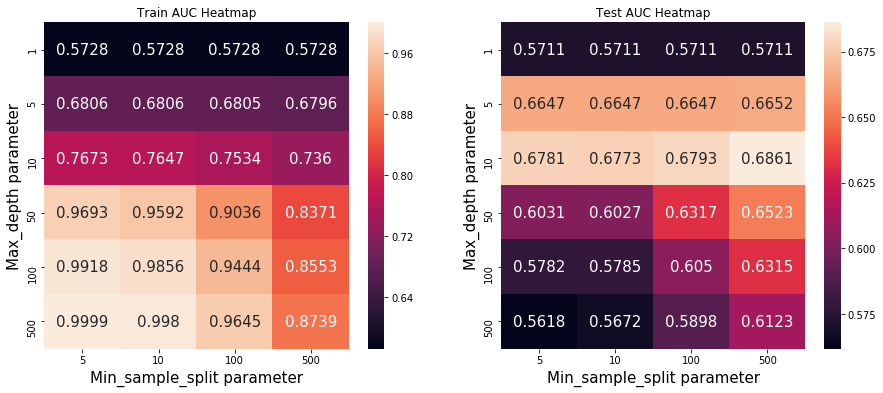

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(test_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15);
plt.title("Test AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is observerd for max_depth 10, also differnce Train AUC score & CV AUC score is minimum at this value with min_sample_split 500.

In [7]:
print('Best parameters: ',clf.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 500}


<font color = 'blue'>For set 1(BOW), by using GridSearchCV we have tuned hyperparameter max_depth and min_sample_split. Next, we will train a fresh Decision tree model using best 'max_depth': 10, 'min_samples_split': 500 and find the AUC on test data and plot the ROC curve on both train and test data.

In [8]:
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight='balanced',max_depth= clf.best_params_['max_depth'], min_samples_split= clf.best_params_['min_samples_split'])
model.fit(train_bow, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### <font color='charcoal'>Visualizing DecisionTree

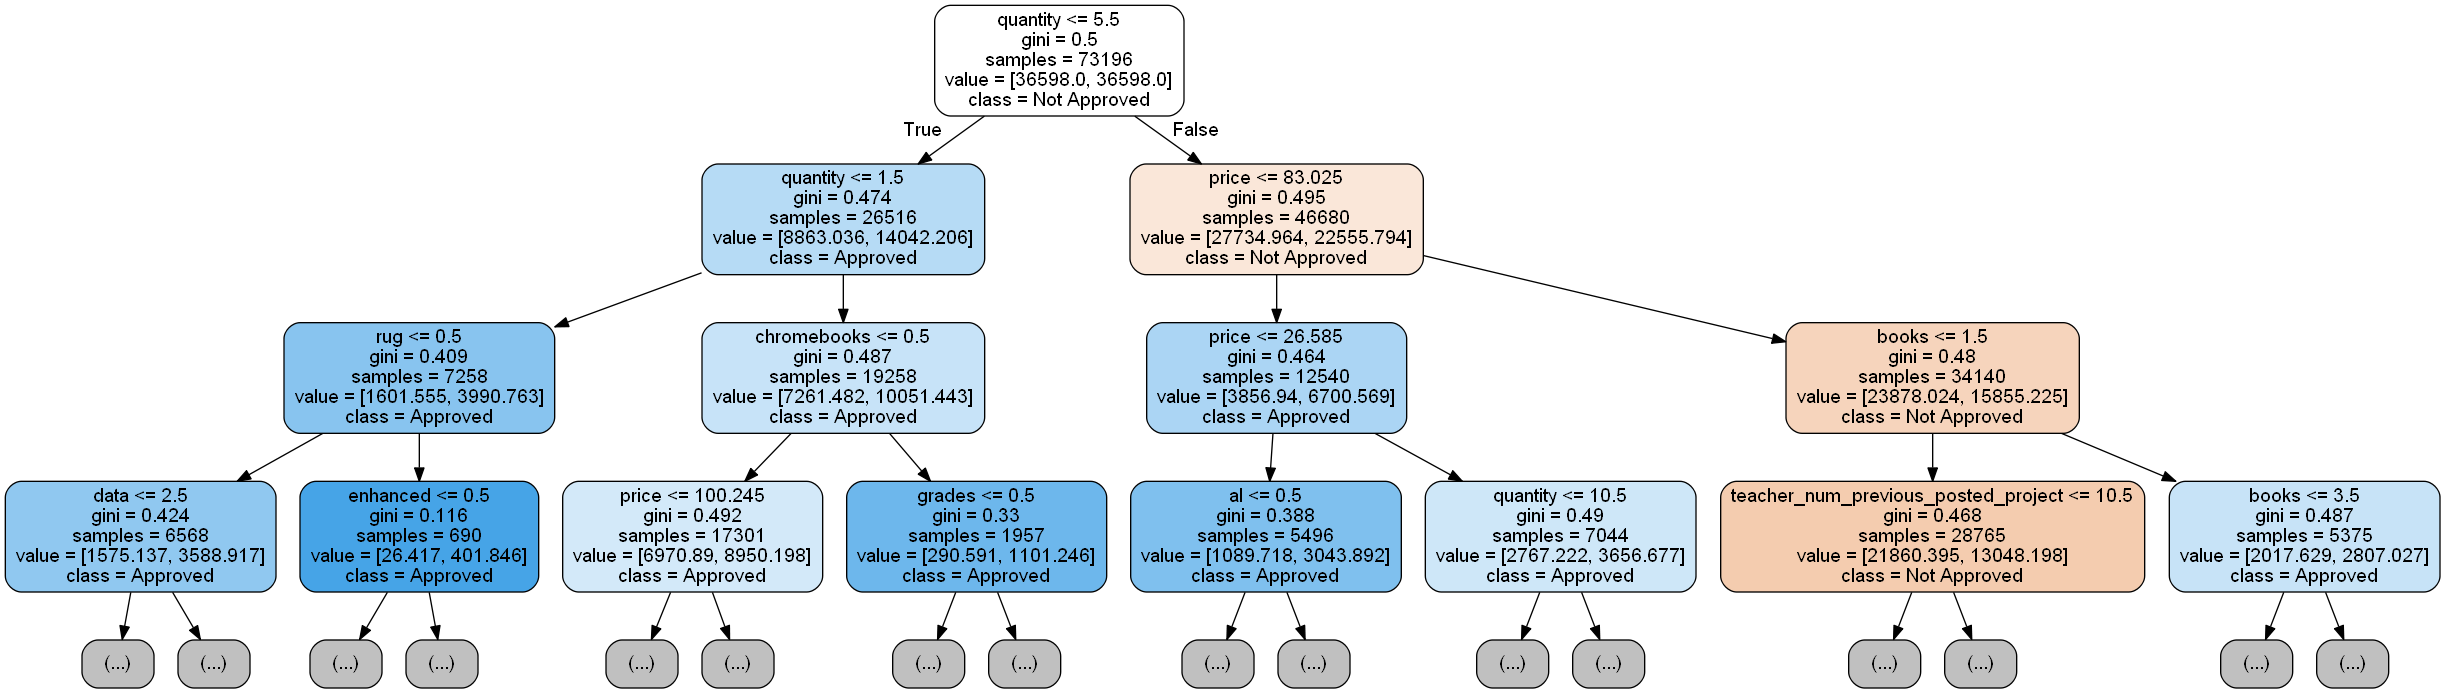

In [9]:
# visualizing decision tree using graphviz https://stackoverflow.com/a/45533426/8107740
import graphviz
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
graph = graphviz.Source(tree.export_graphviz(model, out_file = None,max_depth=3,class_names=['Not Approved','Approved'],
                                             feature_names = feature_bow,filled=True, rounded = True))

img = graph.pipe(format='png')
with open('img_bow.png','wb') as f:
    f.write(img)

from IPython.display import Image
Image(img)

In [10]:
y_train_pred = model.predict_proba(train_bow)[:,1]
y_test_pred = model.predict_proba(test_bow)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

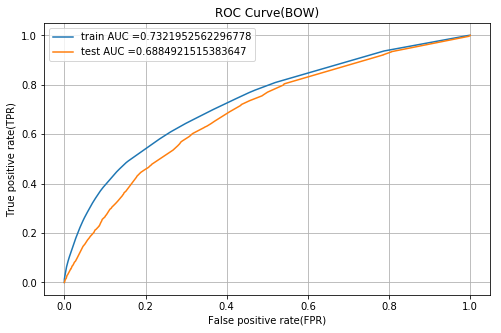

In [11]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(BOW)")
plt.grid()
plt.show()

AUC for train set is 0.73, and AUC for test set is 0.68

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [12]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_bow))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_bow))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

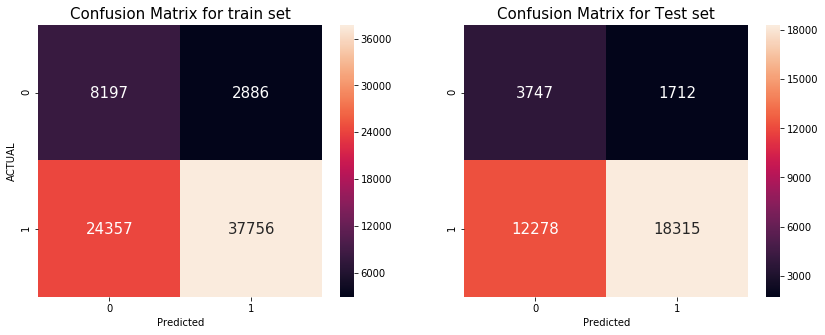

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set1(BOW), on test data DecisionTreeClassifier model has high TPR and low FPR.

### <font color='charcoal'>WordCloud for Falsepositive data points on test data.
False positive data points means data which are falsely labeled as positive, but actually they  belong to negative class(Not approved projects)

Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python
<br>Three steps to generate wordcloud:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

In [14]:
test_pred = model.predict(test_bow)
#Finding index of False positive points
ind = np.logical_and(y_test==0,test_pred== 1)

text =  " ".join(essay for essay in X_test.loc[ind,'essay'])   #Text extracted
print('Number of words in extracted text for false positive essay: ', len(text))

Number of words in extracted text for false positive essay:  1635666


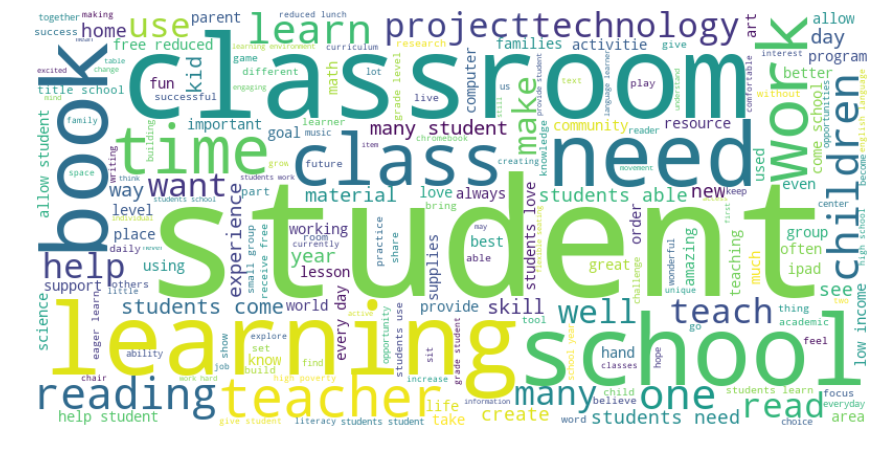

In [15]:
#Genrating wordcloud image
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',max_words=200,width=800, height=400).generate(text) 

#https://stackoverflow.com/a/28795577/8107740
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>>We have generated wordcloud for essay of all false positive data points on test set(BOW). From wordcloud, words like <font color='indigo'>**classroom, learning, student, book**</font> occurs more frequently in essays of all false positive data points.

### <font color='charcoal'>Box plot with the `price` of `false positive data points`

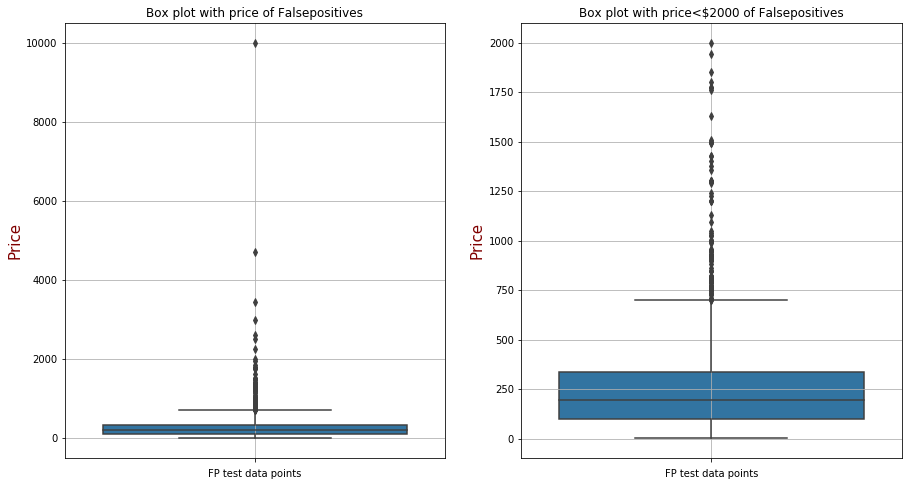

In [16]:
price = X_test.loc[ind, 'price']
plt.figure(figsize = (15,8))
plt.subplot(121)
sn.boxplot(y = price)
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price of Falsepositives')
plt.grid()
plt.subplot(122)
sn.boxplot(y = price[price<2000])
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price<$2000 of Falsepositives')
plt.grid()

- In the above left side boxplot, shows the distribution of price for all false positive data points. In this box plot most of the data points(projects) which are falsely labeled as positive have price mostly in the range \\$0 to \\$2000.<br>
- In the right side boxplot, we zoomed in for the projects having price less than \\$2000. We can see that these projects which are falsely classified as positive has median price as \\$225.
<br>
- So we might say that projects having lower price around $225 are more likely to get accepted and hence these not approved projects are labeled as accepted by our model.

### <font color='charcoal'>PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [17]:
num_project = X_test.loc[ind,'teacher_number_of_previously_posted_projects']

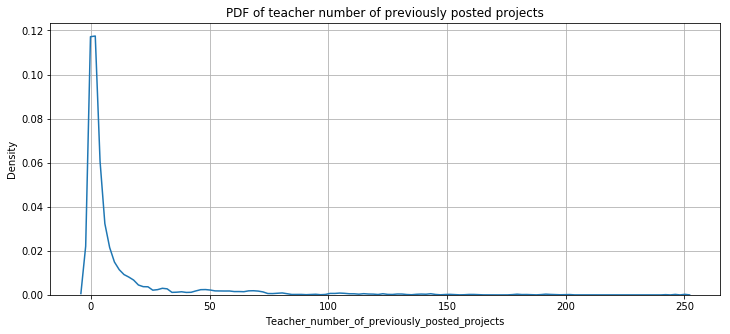

In [18]:
plt.figure(figsize=(12,5))
sn.distplot(num_project,hist=False)
plt.title('PDF of teacher number of previously posted projects')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.grid();

Above plot shows the distribution of teacher_number_of_previously_posted_projects for those projects which are falsely labeled as accepted project by our trained decision tree classifier. This density plot is more dense in the range from 0 to 15, which means teachers has previously submitted projects around 0 to 15.

## 2.3.2 Applying DecisionTree on TFIDF, SET 2

In [19]:
import pickle
#loading Set 2 data
with open('train_tfidf.pickle', 'rb') as f:
    train_tfidf = pickle.load(f)
    
with open('test_tfidf.pickle', 'rb') as f:
    test_tfidf = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)
    
with open('feature_tfidf.pickle', 'rb') as f:
    feature_tfidf = pickle.load(f)

<font color = 'blue'> Using GridSearchCV for hyperparameter tuning.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],
               'min_samples_split':  [5, 10, 100, 500]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True)
clf.fit(train_tfidf, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [21]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [22]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_train_score'])
cv_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_test_score'])
print(train_score)
print(cv_score)

                        mean_train_score                              
param_min_samples_split              5         10        100       500
param_max_depth                                                       
1                               0.572842  0.572842  0.572842  0.572842
5                               0.680591  0.680591  0.680335  0.679756
10                              0.779313  0.777784  0.761985  0.741878
50                              0.978307  0.969361  0.913899  0.856245
100                             0.992736  0.987884  0.947145  0.878218
500                             0.999957  0.998859  0.969444  0.904612
                        mean_test_score                              
param_min_samples_split             5         10        100       500
param_max_depth                                                      
1                              0.571095  0.571095  0.571095  0.571095
5                              0.662861  0.662812  0.662769  0.663260
10         

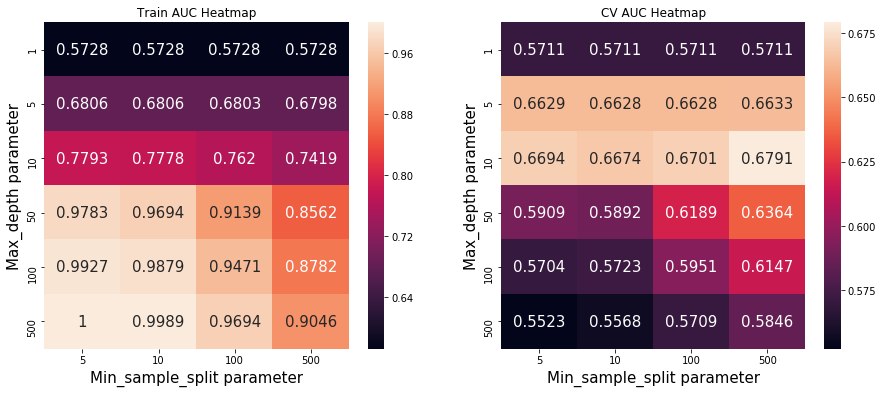

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(cv_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15);
plt.title("CV AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is observerd for max_depth 10, also differnce Train AUC score & CV AUC score is minimum at this value with min_sample_split 500.

In [24]:
print('Best parameters: ',clf.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 500}


<font color = 'blue'>For set 2(TFIDF), by using GridSearchCV we have tuned hyperparameter max_depth and min_sample_split. Next, we will train a fresh Decision tree model using best 'max_depth': 10, 'min_samples_split': 500 and find the AUC on test data and plot the ROC curve on both train and test data.

In [25]:
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight='balanced',max_depth= clf.best_params_['max_depth'], min_samples_split= clf.best_params_['min_samples_split'])
model.fit(train_tfidf, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### <font color='charcoal'>Visualizing DecisionTree

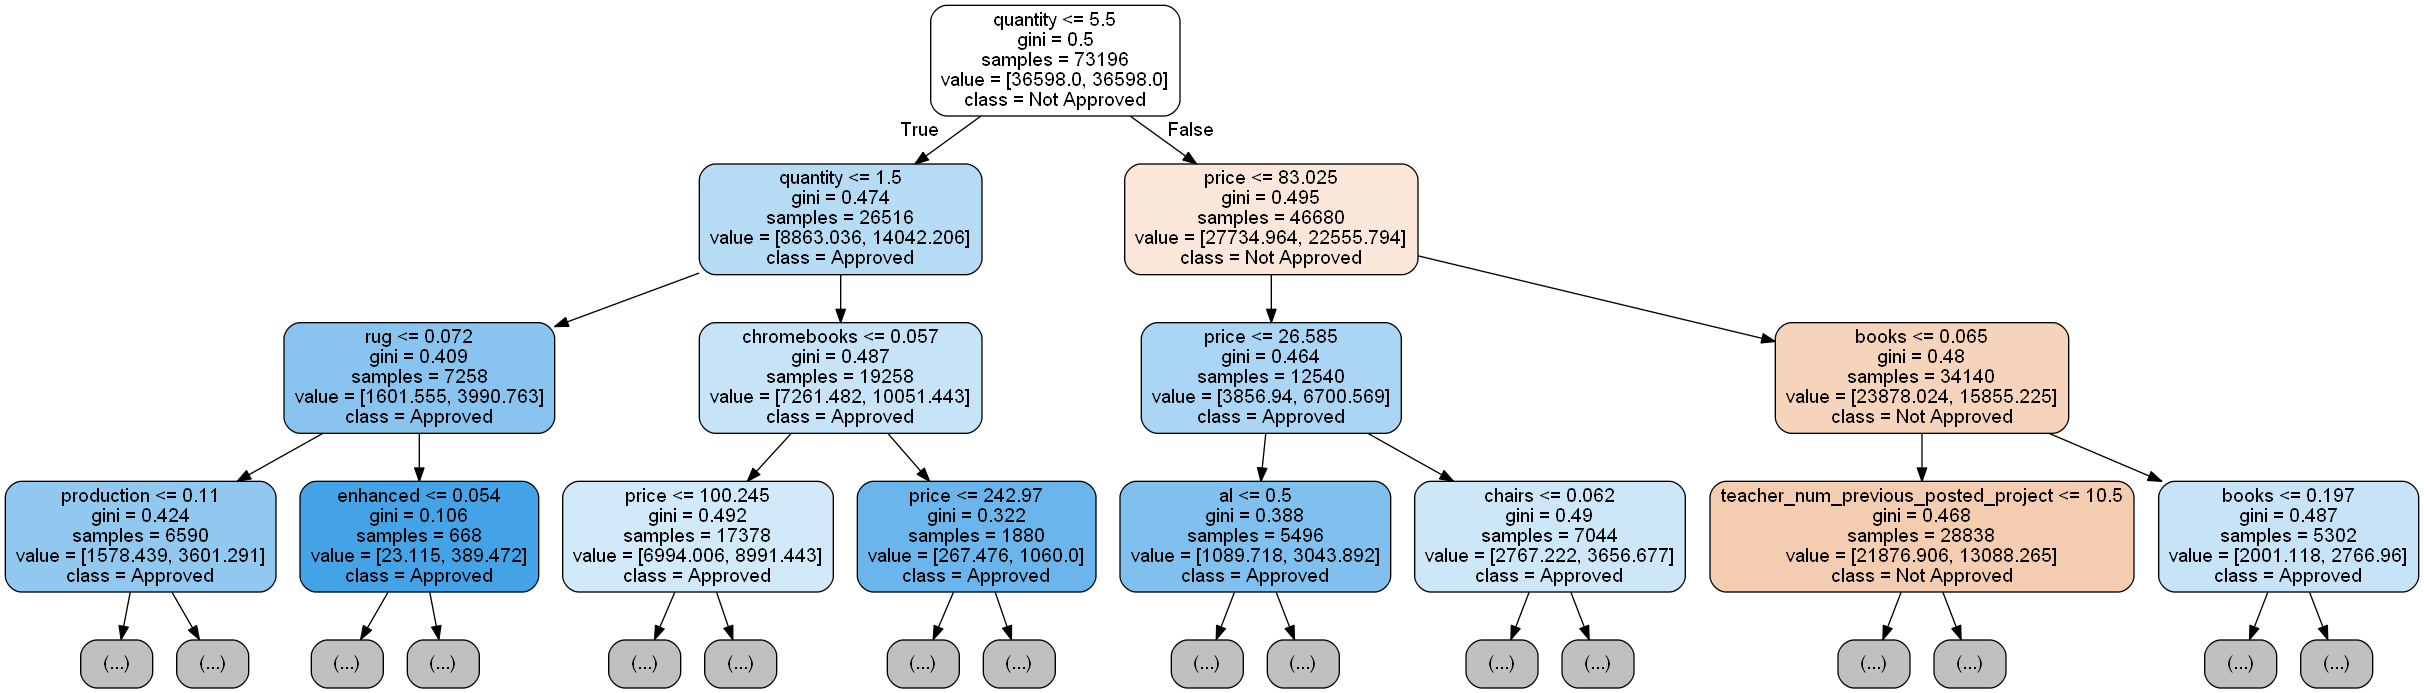

In [26]:
# visualizing decision tree using graphviz https://stackoverflow.com/a/45533426/8107740
import graphviz
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
graph = graphviz.Source(tree.export_graphviz(model, out_file = None,max_depth=3,class_names=['Not Approved','Approved'],
                                             feature_names = feature_tfidf,filled=True, rounded = True))

img_tfidf = graph.pipe(format='png')
with open('img_dtree.png','wb') as f:
    f.write(img_tfidf)

from IPython.display import Image
Image(img_tfidf)

In [27]:
y_train_pred = model.predict_proba(train_tfidf)[:,1]
y_test_pred = model.predict_proba(test_tfidf)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

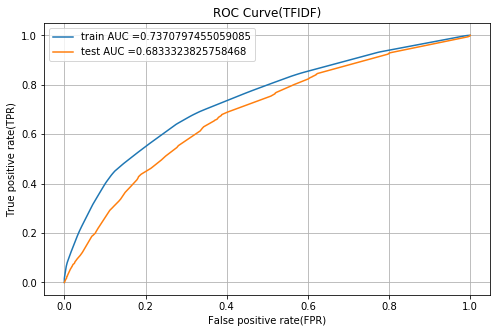

In [28]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(TFIDF)")
plt.grid()
plt.show()

AUC for train set is 0.73, and AUC for test set is 0.68

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [29]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_tfidf))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_tfidf))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

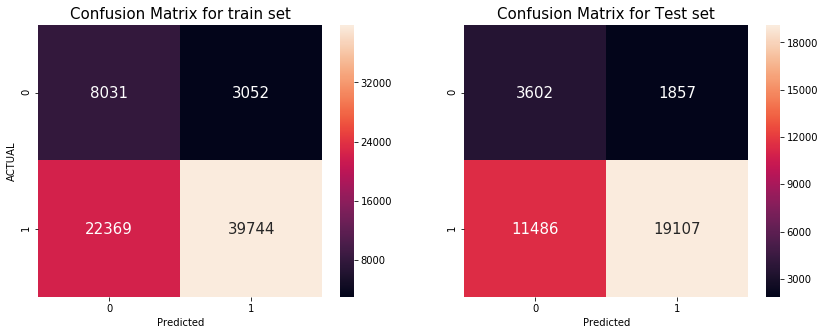

In [30]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set2(TFIDF), on test data DecisionTreeClassifier model has high TPR and low FPR.

### <font color='charcoal'>WordCloud for Falsepositive data points on test data.
False positive data points means data which are falsely labeled as positive, but actually they  belong to negative class(Not approved projects)

Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python
<br>Three steps to generate wordcloud:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

In [31]:
test_pred = model.predict(test_tfidf)
#Finding index of False positive points
ind = np.logical_and(y_test==0,test_pred== 1)

text =  " ".join(essay for essay in X_test.loc[ind,'essay'])   #Text extracted
print('Number of words in extracted text for false positive essay: ', len(text))

Number of words in extracted text for false positive essay:  1788287


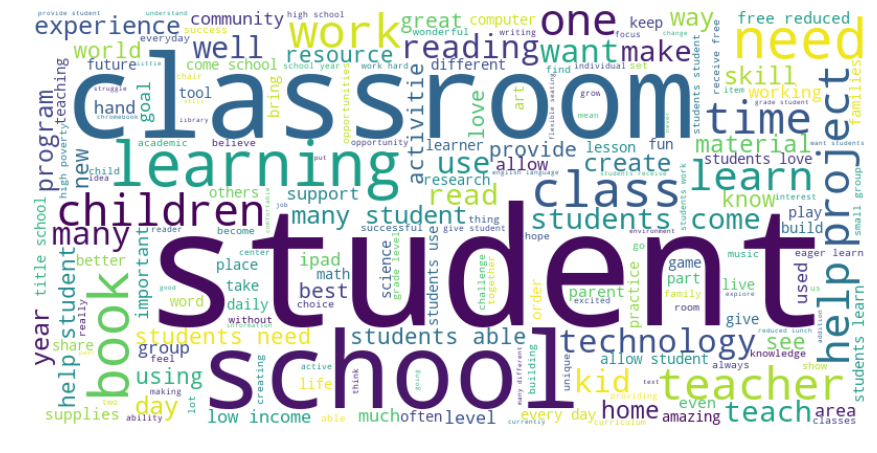

In [32]:
#Genrating wordcloud image
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',max_words=200,width=800, height=400).generate(text) 

#https://stackoverflow.com/a/28795577/8107740
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>>We have generated wordcloud for essay of all false positive data points on test set(TFIDF). From wordcloud, words like <font color='indigo'>**classroom, student, school,**</font> occurs more frequently in essays of all false positive data points.

### <font color='charcoal'>Box plot with the `price` of `false positive data points`

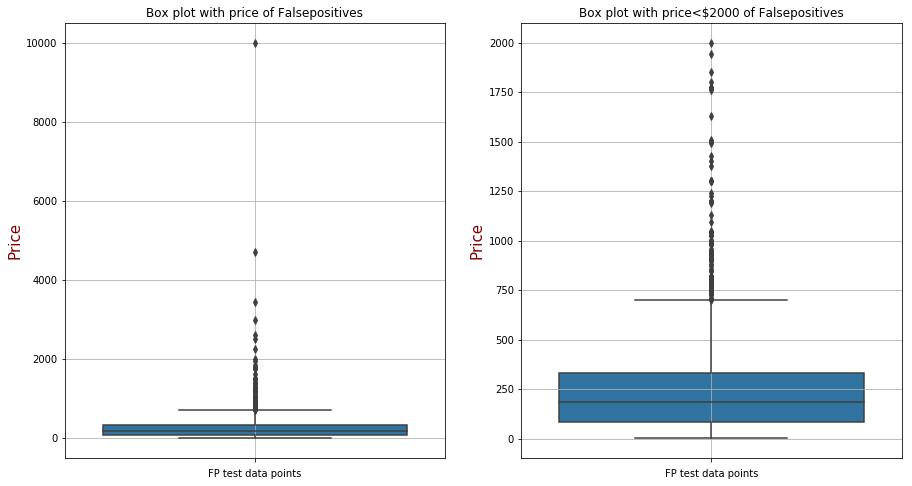

In [34]:
price = X_test.loc[ind, 'price']
plt.figure(figsize = (15,8))
plt.subplot(121)
sn.boxplot(y = price)
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price of Falsepositives')
plt.grid()
plt.subplot(122)
sn.boxplot(y = price[price<2000])
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price<$2000 of Falsepositives')
plt.grid()

In the above left side boxplot, shows the distribution of price for all false positive data points. In this box plot most of the data points(projects) which are falsely labeled as positive have price mostly in the range \\$0 to \\$2000.
<br>In the right side boxplot, we zoomed in for the projects having price less than \\$4000. We can see that these projects which are falsely classified as positive has median price around \\$225.
<br>
So we might say that projects having lower price around $225 are more likely to get accepted and hence these not approved projects are labeled as accepted by our model.

### <font color='charcoal'>PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [35]:
num_project = X_test.loc[ind,'teacher_number_of_previously_posted_projects']

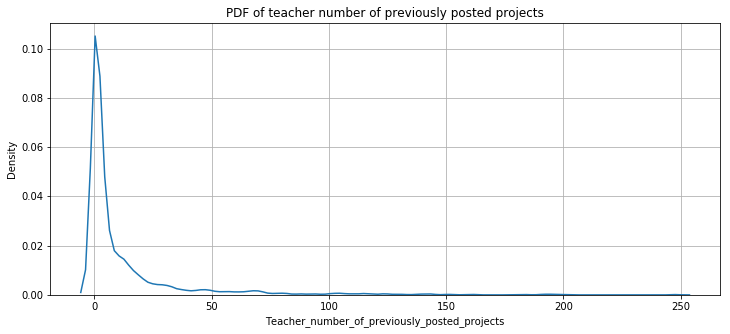

In [36]:
plt.figure(figsize=(12,5))
sn.distplot(num_project,hist=False)
plt.title('PDF of teacher number of previously posted projects')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.grid();

Above plot shows the distribution of teacher_number_of_previously_posted_projects for those projects which are falsely labeled as accepted project by our trained decision tree classifier. This density plot is more dense in the range from 0 to 15, which means teachers has previously submitted projects around 0 to 15.

### <font color='teal'>Creating set of 5k best features(Task 2) using *feature_importances_*

In [37]:
imp = model.feature_importances_
ind_5k = np.argsort(imp)[::-1][0:5000] #selecting top 5k feature indices

In [38]:
best5k_train = train_tfidf.toarray()[:,ind_5k]
best5k_test = test_tfidf.toarray()[:,ind_5k]
print('Shape of train set ',best5k_train.shape)
print('Shape of test set ', best5k_test.shape)

Shape of train set  (73196, 5000)
Shape of test set  (36052, 5000)


In [39]:
from scipy import sparse
#Saving to pickle file
with open('best5k_train.pickle','wb') as f:
    pickle.dump(sparse.coo_matrix(best5k_train), f)
    
with open('best5k_test.pickle','wb') as f:
    pickle.dump(sparse.coo_matrix(best5k_test), f)

## 2.3.3 Applying DecisionTree on AVGW2V, SET 3

In [40]:
import pickle
#loading Set 3 data
with open('train_avgw2v.pickle', 'rb') as f:
    train_avgw2v = pickle.load(f)
    
with open('test_avgw2v.pickle', 'rb') as f:
    test_avgw2v = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

<font color = 'blue'> Using GridSearchCV for hyperparameter tuning.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],
               'min_samples_split':  [5, 10, 100, 500]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True)
clf.fit(train_avgw2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [42]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [43]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_train_score'])
test_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_test_score'])
print(train_score)
print(test_score)

                        mean_train_score                              
param_min_samples_split              5         10        100       500
param_max_depth                                                       
1                               0.572842  0.572842  0.572842  0.572842
5                               0.687981  0.687981  0.687981  0.686850
10                              0.817915  0.815772  0.791554  0.746548
50                              0.999778  0.997961  0.898873  0.768098
100                             0.999890  0.998267  0.899187  0.768175
500                             0.999889  0.998282  0.898984  0.768098
                        mean_test_score                              
param_min_samples_split             5         10        100       500
param_max_depth                                                      
1                              0.571095  0.571095  0.571095  0.571095
5                              0.667275  0.667275  0.667275  0.667369
10         

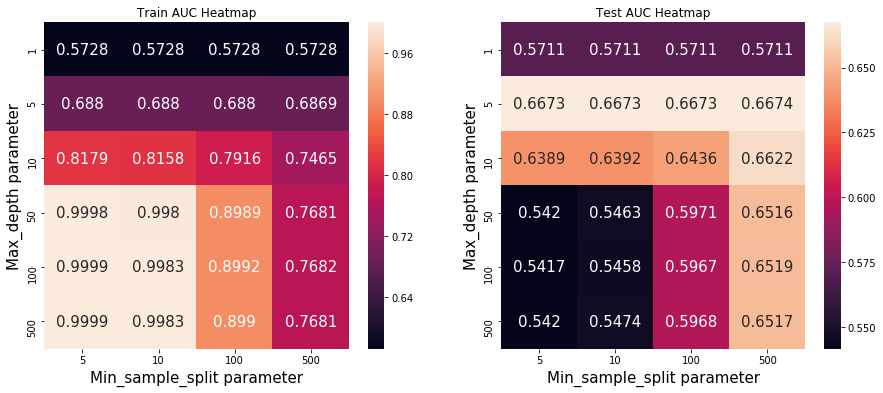

In [44]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(test_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15);
plt.title("Test AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is observerd for max_depth 5, also differnce Train AUC score & CV AUC score is minimum at this value with min_sample_split 500.

In [45]:
print('Best parameters: ',clf.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 500}


<font color = 'blue'>For set 3(AVGW2V), by using GridSearchCV we have tuned hyperparameter max_depth and min_sample_split. Next, we will train a fresh Decision tree model using best 'max_depth': 5, 'min_samples_split': 500 and find the AUC on test data and plot the ROC curve on both train and test data.

In [46]:
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight='balanced',max_depth= clf.best_params_['max_depth'], min_samples_split= clf.best_params_['min_samples_split'])
model.fit(train_avgw2v, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
y_train_pred = model.predict_proba(train_avgw2v)[:,1]
y_test_pred = model.predict_proba(test_avgw2v)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

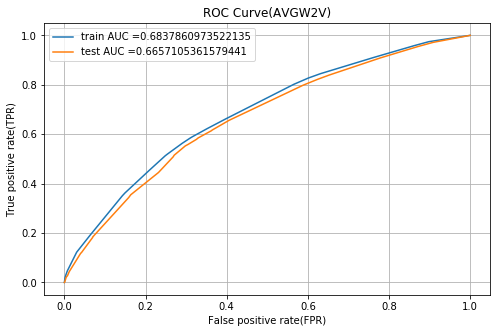

In [48]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(AVGW2V)")
plt.grid()
plt.show()

AUC for train set is 0.68, and AUC for test set is 0.66

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [49]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_avgw2v))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_avgw2v))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

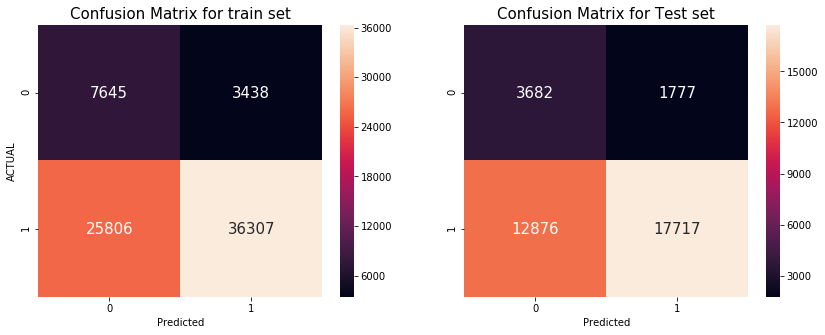

In [50]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set3(AVGW2V), on test data DecisionTreeClassifier model has high TPR and low FPR.

### <font color='charcoal'>WordCloud for Falsepositive data points on test data.
False positive data points means data which are falsely labeled as positive, but actually they  belong to negative class(Not approved projects)

Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python
<br>Three steps to generate wordcloud:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

In [51]:
test_pred = model.predict(test_avgw2v)
#Finding index of False positive points
ind = np.logical_and(y_test==0,test_pred== 1)

text =  " ".join(essay for essay in X_test.loc[ind,'essay'])   #Text extracted
print('Number of words in extracted text for false positive essay: ', len(text))

Number of words in extracted text for false positive essay:  1692251


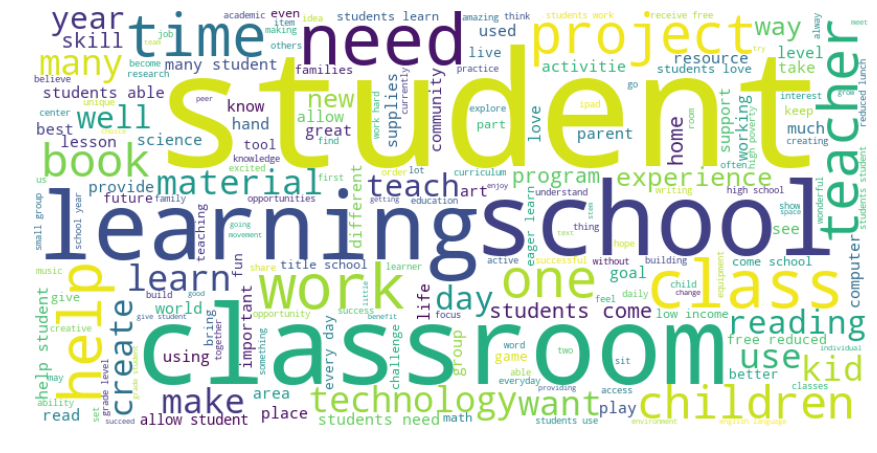

In [52]:
#Genrating wordcloud image
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',max_words=200,width=800, height=400).generate(text) 

#https://stackoverflow.com/a/28795577/8107740
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>>We have generated wordcloud for essay of all false positive data points on test set(AVGW2V). From wordcloud, words like <font color='indigo'>**classroom, student**</font> occurs more frequently in essays of all false positive data points.

### <font color='charcoal'>Box plot with the `price` of `false positive data points`

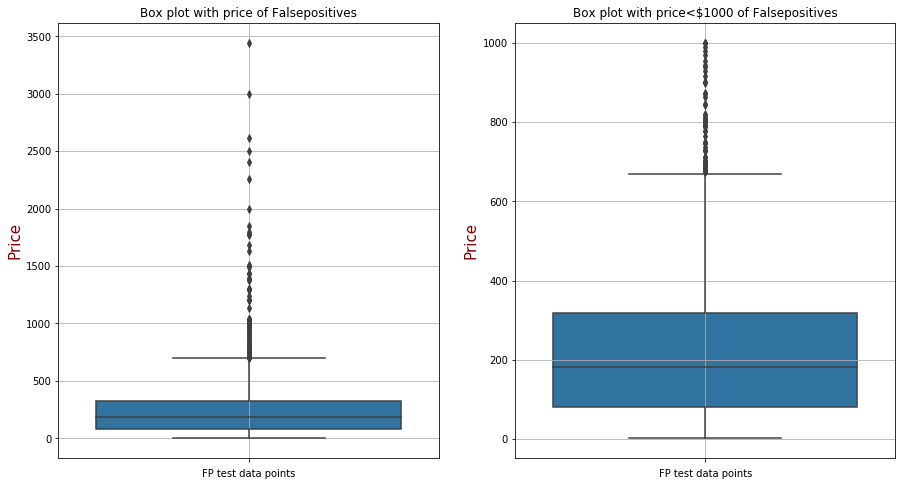

In [54]:
price = X_test.loc[ind, 'price']
plt.figure(figsize = (15,8))
plt.subplot(121)
sn.boxplot(y = price)
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price of Falsepositives')
plt.grid()
plt.subplot(122)
sn.boxplot(y = price[price<1000])
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price<$1000 of Falsepositives')
plt.grid()

In the above left side boxplot, shows the distribution of price for all false positive data points. In this box plot most of the data points(projects) which are falsely labeled as positive have price mostly in the range \\$0 to \\$1000.
<br>In the right side boxplot, we zoomed in for the projects having price less than \\$1000. We can see that these projects which are falsely classified as positive has median price is less than \\$200.
<br>
So we might say that projects having lower price around $200 are more likely to get accepted and hence these not approved projects are labeled as accepted by our model.

### <font color='charcoal'>PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [55]:
num_project = X_test.loc[ind,'teacher_number_of_previously_posted_projects']

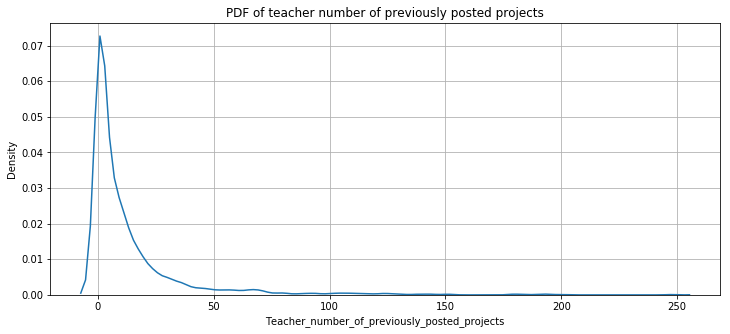

In [56]:
plt.figure(figsize=(12,5))
sn.distplot(num_project,hist=False)
plt.title('PDF of teacher number of previously posted projects')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.grid();

Above plot shows the distribution of teacher_number_of_previously_posted_projects for those projects which are falsely labeled as accepted project by our trained decision tree classifier. This density plot is more dense in the range from 0 to 15, which means teachers has previously submitted projects around 0 to 20.

## 2.3.4 Applying DecisionTree on TFIDFW2V, SET 4

In [57]:
import pickle
#loading Set 4 data
with open('train_tfidfw2v.pickle', 'rb') as f:
    train_tfidfw2v = pickle.load(f)
    
with open('test_tfidfw2v.pickle', 'rb') as f:
    test_tfidfw2v = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

<font color = 'blue'> Using GridSearchCV for hyperparameter tuning.

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],
               'min_samples_split':  [5, 10, 100, 500]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True)
clf.fit(train_tfidfw2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [59]:
import pandas as pd
import numpy as np
cvr = pd.DataFrame(clf.cv_results_)

In [60]:
train_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_train_score'])
test_score = pd.pivot_table(cvr,index= 'param_max_depth', columns='param_min_samples_split', values=['mean_test_score'])
print(train_score)
print(test_score)

                        mean_train_score                              
param_min_samples_split              5         10        100       500
param_max_depth                                                       
1                               0.585735  0.585735  0.585735  0.585735
5                               0.691312  0.691312  0.691120  0.690663
10                              0.818542  0.816731  0.791215  0.749924
50                              0.999862  0.998235  0.896046  0.769538
100                             0.999888  0.998325  0.895883  0.769570
500                             0.999893  0.998302  0.896220  0.769538
                        mean_test_score                              
param_min_samples_split             5         10        100       500
param_max_depth                                                      
1                              0.583756  0.583756  0.583756  0.583756
5                              0.671860  0.671860  0.671842  0.672315
10         

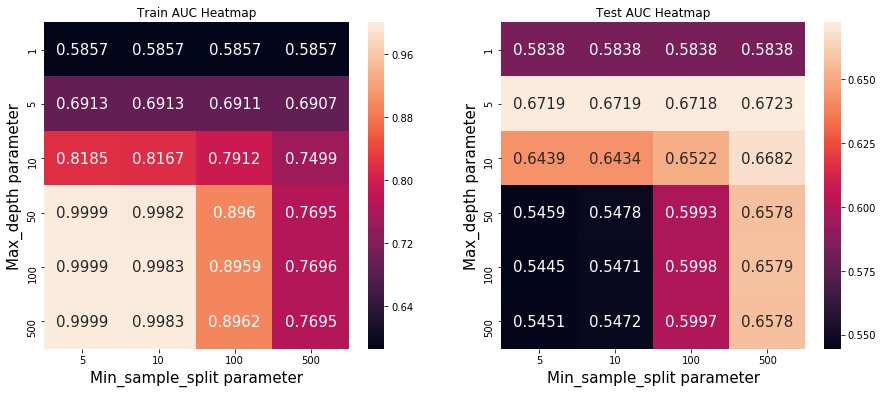

In [61]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
sb.heatmap(train_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15)
plt.title("Train AUC Heatmap")
plt.subplot(122)
sb.heatmap(test_score, annot=True, fmt='.4g',annot_kws={'size': 15},xticklabels=[5,10,100,500]);
plt.ylabel('Max_depth parameter', fontsize = 15)
plt.xlabel('Min_sample_split parameter', fontsize = 15);
plt.title("Test AUC Heatmap");

From above heatmap, maximum value of AUC for CV data is observerd for max_depth 5, also differnce Train AUC score & CV AUC score is minimum at this value with min_sample_split 500.

In [62]:
print('Best parameters: ',clf.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 500}


<font color = 'blue'>For set 4(TFIDFW2V), by using GridSearchCV we have tuned hyperparameter max_depth and min_sample_split. Next, we will train a fresh Decision tree model using best 'max_depth': 10, 'min_samples_split': 500 and find the AUC on test data and plot the ROC curve on both train and test data.

In [63]:
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(class_weight='balanced',max_depth= clf.best_params_['max_depth'], min_samples_split= clf.best_params_['min_samples_split'])
model.fit(train_tfidfw2v, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
y_train_pred = model.predict_proba(train_tfidfw2v)[:,1]
y_test_pred = model.predict_proba(test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

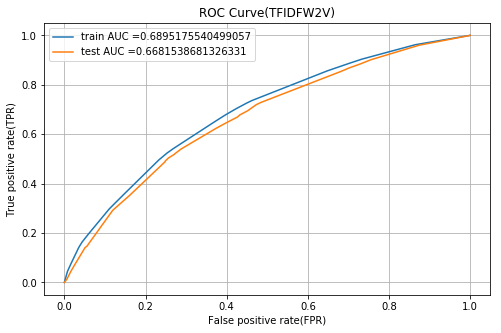

In [65]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(TFIDFW2V)")
plt.grid()
plt.show()

AUC for train set is 0.68, and AUC for test set is 0.66

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [66]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(train_tfidfw2v))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(test_tfidfw2v))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

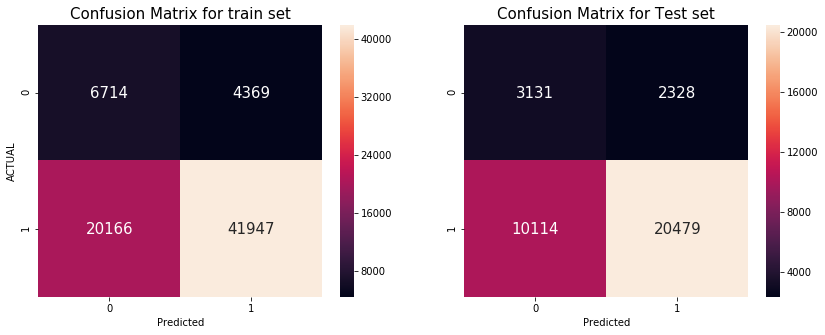

In [67]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

For Set4(TFIDFW2V), on test data DecisionTreeClassifier model has high TPR and low FPR.

### <font color='charcoal'>WordCloud for Falsepositive data points on test data.
False positive data points means data which are falsely labeled as positive, but actually they  belong to negative class(Not approved projects)

Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python
<br>Three steps to generate wordcloud:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

In [68]:
test_pred = model.predict(test_tfidfw2v)
#Finding index of False positive points
ind = np.logical_and(y_test==0,test_pred== 1)

text =  " ".join(essay for essay in X_test.loc[ind,'essay'])   #Text extracted
print('Number of words in extracted text for false positive essay: ', len(text))

Number of words in extracted text for false positive essay:  2205522


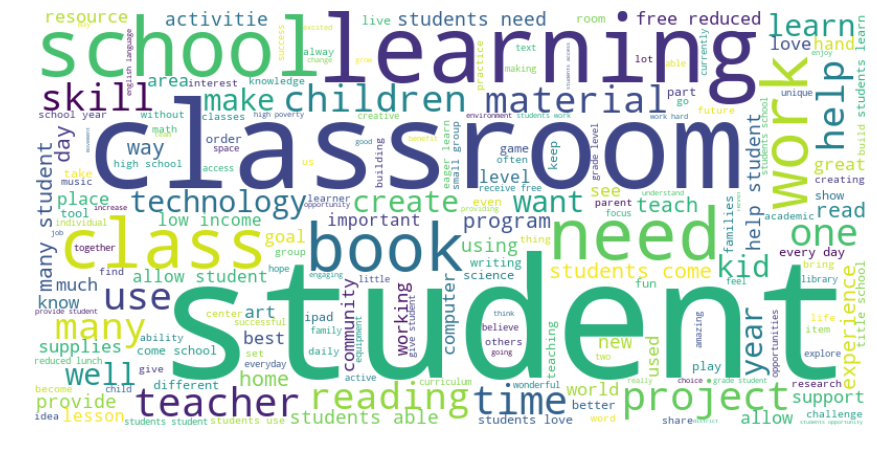

In [69]:
#Genrating wordcloud image
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',max_words=200,width=800, height=400).generate(text) 

#https://stackoverflow.com/a/28795577/8107740
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>>We have generated wordcloud for essay of all false positive data points on test set(TFIDFW2V). From wordcloud, words like <font color='indigo'>** student, classroom, learning**</font> occurs more frequently in essays of all false positive data points.

### <font color='charcoal'>Box plot with the `price` of `false positive data points`

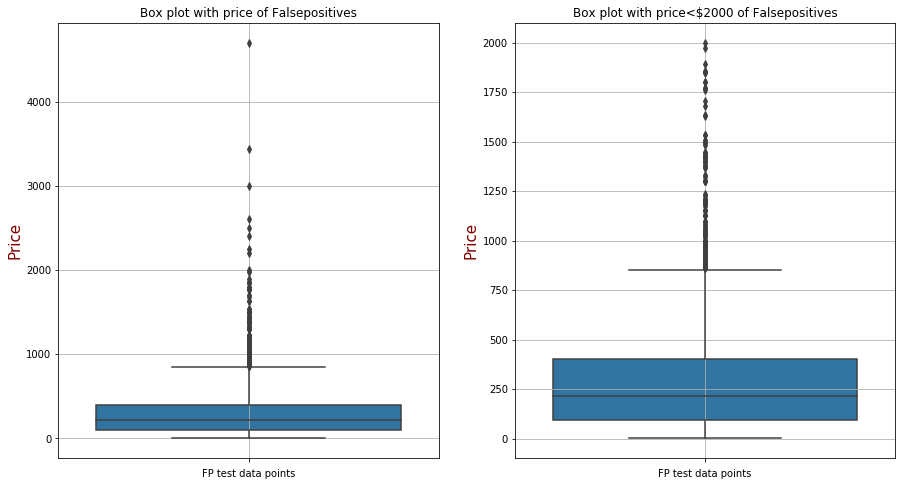

In [70]:
price = X_test.loc[ind, 'price']
plt.figure(figsize = (15,8))
plt.subplot(121)
sn.boxplot(y = price)
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price of Falsepositives')
plt.grid()
plt.subplot(122)
sn.boxplot(y = price[price<2000])
plt.ylabel('Price', fontsize = 15, color = 'maroon')
plt.xlabel('FP test data points')
plt.title('Box plot with price<$2000 of Falsepositives')
plt.grid()

In the above left side boxplot, shows the distribution of price for all false positive data points. In this box plot most of the data points(projects) which are falsely labeled as positive have price mostly in the range \\$0 to \\$2000.
<br>In the right side boxplot, we zoomed in for the projects having price less than \\$2000. We can see that these projects which are falsely classified as positive has median price as \\$250.
<br>
So we might say that projects having lower price around $250 are more likely to get accepted and hence these not approved projects are labeled as accepted by our model.

### <font color='charcoal'>PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [71]:
num_project = X_test.loc[ind,'teacher_number_of_previously_posted_projects']

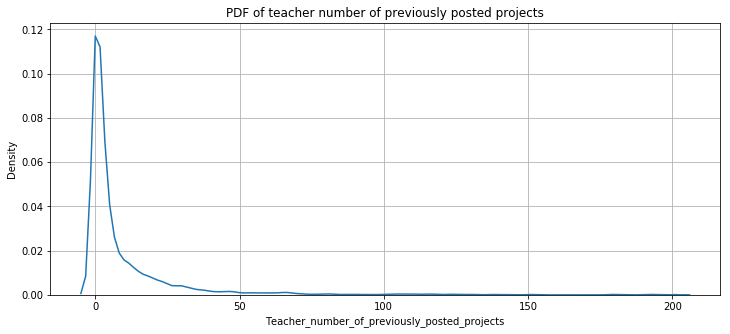

In [72]:
plt.figure(figsize=(12,5))
sn.distplot(num_project,hist=False)
plt.title('PDF of teacher number of previously posted projects')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density')
plt.grid();

Above plot shows the distribution of teacher_number_of_previously_posted_projects for those projects which are falsely labeled as accepted project by our trained decision tree classifier. This density plot is more dense in the range from 0 to 15, which means teachers has previously submitted projects around 0 to 15.

## 2.3.5 Applying Logistic Regression on Best 5k features, Task 2(Set 5)

In [1]:
import pickle 
#loading task data
with open('best5k_train.pickle', 'rb') as f:
    best5k_train = pickle.load(f)
    
with open('best5k_test.pickle', 'rb') as f:
    best5k_test = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [2]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
best5k_train = normalizer.fit_transform(best5k_train)
best5k_test = normalizer.transform(best5k_test)

<font color = 'blue'> Using GridSearchCV for hyperparameter tuning.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'newton-cg', class_weight='balanced')
parameters = {'C': [10**(-4),10**(-3),10**(-2),10**(-1),1,10**(1),10**(2),10**(3),10**(4)]}

clf = GridSearchCV(model,param_grid=parameters, cv = 3,scoring='roc_auc', return_train_score=True)
clf.fit(best5k_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

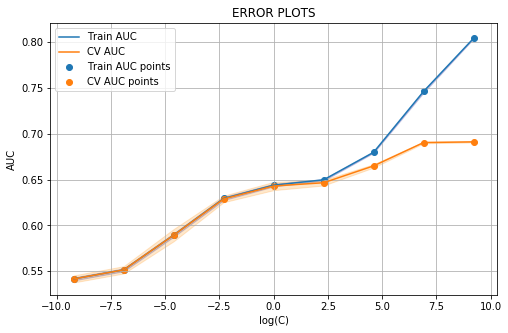

In [5]:
import matplotlib.pyplot as plt
import numpy as np
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(8,5))
plt.plot(np.log(parameters['C']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['C']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(np.log(parameters['C']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['C']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(np.log(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['C']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(C)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

From above plot(log(C) vs. AUC), maximum value of AUC for CV data is approximately around log(C) = 10, also gap between Train AUC curve & CV AUC curve is observed to be minimum at this values 10

In [6]:
print('Best parameters: ',clf.best_params_)

Best parameters:  {'C': 10000}


<font color = 'blue'>For set 5(BEST 5k features), by using GridSearchCV we have tuned hyperparameter C. Next, we will train a fresh Logistic Regression model using best 'C': 10000 and find the AUC on test data and plot the ROC curve on both train and test data.

In [7]:
from sklearn.metrics import roc_curve, auc

model = LogisticRegression(solver='newton-cg',class_weight='balanced', C = clf.best_params_['C'])
model.fit(best5k_train, y_train)

LogisticRegression(C=10000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [8]:
y_train_pred = model.predict_proba(best5k_train)[:,1]
y_test_pred = model.predict_proba(best5k_test)[:,1]

train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

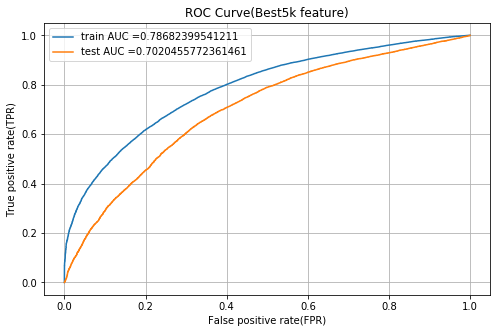

In [9]:
plt.figure(figsize=(8,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve(Best5k feature)")
plt.grid()
plt.show()

AUC for train set is 0.78, and AUC for test set is 0.70

### <font color='charcoal'>Plotting confusion matrix
How to plot confusion matrix: https://stackoverflow.com/a/42265865/8107740

In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm_train = confusion_matrix(y_train, model.predict(best5k_train))
cm_train = pd.DataFrame(cm_train, columns=[0,1],index=[0,1])

cm_test = confusion_matrix(y_test, model.predict(best5k_test))
cm_test = pd.DataFrame(cm_test, columns=[0,1],index=[0,1])

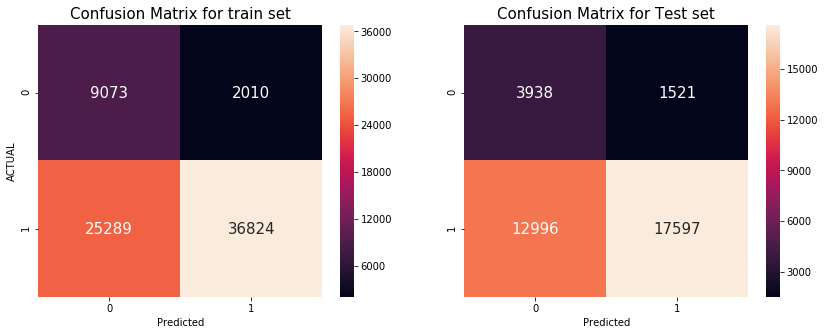

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#plt.tight_layout()
#plt.subplots_adjust(wspace= 2)
sn.heatmap(cm_train, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for train set', fontdict={'fontsize': 15})
plt.ylabel('ACTUAL')
plt.xlabel('Predicted')
plt.subplot(122)
sn.heatmap(cm_test, annot= True, annot_kws={'size': 15}, fmt = 'd')
plt.title('Confusion Matrix for Test set', fontdict={'fontsize': 15})
plt.xlabel('Predicted')
plt.show()

By using best 5k features, on test data Logistic Regression model has high TPR and low FPR.

<h1>3. Conclusion</h1>

On Donors Choose dataset, we have applied Decision tree model to predict whether a project submitted should be approved or rejected. <br>
We created five sets of features to build model, these sets are described below:<br>
1. Bag of word(BOW) method to vectorize text features.
2. TFIDF method to vectorize text features.
3. Average word2vec method to vectorize text features.
4. TFIDF word2vec method to vectorize text features.
5. Best 5k features obtained from set 2 using .feature_importances_<br>
On first 4 sets we tuned hyper parameters 'max_depth' and 'min_samples_split' using GridSeacrhCV, then retrained fresh Decision Tree Model using best hyperparmeters.<br>
In all these 4 sets we plotted wordcloud for false positive points in test set. 
Also plotted ROC AUC curve for train and test data, finally at then end plotted confusion matrix.
And finally in set 5 we trained Logitic Regression model.

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names  = ['Vectorizer/Featurization', 'Model','HyperParameter(s)','Test AUC']

In [2]:
x.add_row(['BOW', 'DecisionTreeClassifier','max_depth: 10 , min_samples_split: 500', 0.68])
x.add_row(['TFIDF', 'DecisionTreeClassifier','max_depth: 10 , min_samples_split: 500', 0.68])
x.add_row(['AVGW2V', 'DecisionTreeClassifier','max_depth: 5 , min_samples_split: 500', 0.66])
x.add_row(['TFIDFW2V', 'DecisionTreeClassifier','max_depth: 5 , min_samples_split: 500', 0.66])
x.add_row(['Best5k features', 'LogisticRegression','C: 10000', 0.70])

In [3]:
print(x)

+--------------------------+------------------------+----------------------------------------+----------+
| Vectorizer/Featurization |         Model          |           HyperParameter(s)            | Test AUC |
+--------------------------+------------------------+----------------------------------------+----------+
|           BOW            | DecisionTreeClassifier | max_depth: 10 , min_samples_split: 500 |   0.68   |
|          TFIDF           | DecisionTreeClassifier | max_depth: 10 , min_samples_split: 500 |   0.68   |
|          AVGW2V          | DecisionTreeClassifier | max_depth: 5 , min_samples_split: 500  |   0.66   |
|         TFIDFW2V         | DecisionTreeClassifier | max_depth: 5 , min_samples_split: 500  |   0.66   |
|     Best5k features      |   LogisticRegression   |                C: 10000                |   0.7    |
+--------------------------+------------------------+----------------------------------------+----------+


**Observations :**
1. We have obtained maximum Test AUC of 0.70 on best 5k features i.e set created from TFIDF set using .feature_importances_ 
2. From first 4 sets, maximum test AUC of 0.68 is obtained on Bow Set.
3. For the first 4 sets, from wordcloud of essay(only plotted for false positive points on test set) three words <font color='teal'>student, classroom, learning, school</font> are the most frequently occuring words. 
4. Also from boxplot for price(only plotted for false positive points on test set), we observed that most projects have price ranging from \\$0 to \\$2000. And median price is around $200.
    